In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [2]:
df = pd.read_csv("HumanResources.csv")
df

,employee_id,first_name,last_name,gender,state,city,hire_date,department,job_title,education_level,performance_rating,overtime,base_salary,salary,birth_date,termination_date
0,00-73695798,Olimpiada,Fedotova,Female,Moscow,Moscow,2017-08-28,Sales,Sales Specialist,Bachelor,Good,No,79104,84511,1994-07-25,NaN
1,00-81018730,Ljubov',Baranova,Female,Moscow,Moscow,2022-05-19,Customer Service,Support Specialist,Bachelor,Satisfactory,Yes,54030,58165,1983-12-04,NaN
2,00-29139495,Mstislav,Trofimov,Male,Moscow,Moscow,2018-04-10,Operations,Operations Analyst,Master,Good,No,55805,60266,1974-05-17,NaN
3,00-60298696,Rodion,Pahomov,Male,Moscow,Moscow,2019-11-11,Sales,Sales Representative,Bachelor,Needs Improvement,No,53844,64566,1995-05-02,NaN
4,00-96356860,Zosima,Naumov,Male,Kazan,Kazan,2023-01-01,Operations,Inventory Specialist,High School,Needs Improvement,No,58672,61998,2004-07-13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,00-33964768,Kallistrat,Ovchinnikov,Male,Moscow,Moscow,2022-01-16,Operations,Operations Analyst,Bachelor,Good,No,72819,87473,1985-05-03,NaN
721,00-52644581,Vitalij,Mironov,Male,Moscow,Moscow,2018-08-26,Operations,Inventory Specialist,High School,Needs Improvement,No,54546,59413,2000-01-17,2022-11-27
722,00-24298519,Sidor,Korolev,Male,Moscow,Moscow,2016-05-26,IT,IT Support Specialist,High School,Satisfactory,Yes,52016,55945,1998-05-10,NaN
723,00-24640648,Ljubim,Ovchinnikov,Male,Moscow,Moscow,2020-12-17,Customer Service,Support Specialist,High School,Needs Improvement,Yes,51441,56897,2000-06-29,2023-11-24


In [3]:
df["Attrition"]=df["termination_date"].notna().astype(int)
df["Attrition"]

0      0
1      0
2      0
3      0
4      0
      ..
720    0
721    1
722    0
723    1
724    0
Name: Attrition, Length: 725, dtype: int64

In [4]:
#Drop Unnecessary Columns
df.drop(columns=["employee_id","first_name","last_name","termination_date"],inplace=True)


In [5]:
#Data feture Engineering

df["hire_date"]=pd.to_datetime(df["hire_date"])
df["birth_date"]=pd.to_datetime(df["birth_date"])

df["age"]=(pd.Timestamp.today()-df["birth_date"]).dt.days//365
df["experience_years"]=(pd.Timestamp.today()-df["hire_date"]).dt.days//365

df.drop(columns=["hire_date","birth_date"],inplace=True)


In [6]:
#Encode Binary and Original Features

df["gender"]=df["gender"].map({"Male":1,"Female":0})
df["overtime"]=df["overtime"].map({"Yes":1,"No":0})

education_map={"High School":1,"Bachelor":2,"Master":3,"PhD":4}
df["education_level"]=df["education_level"].map(education_map)

performance_map={
    "Needs Improvement":1,
    "Satisfactory":2,
    "Good":3,
    "Exellent":4
}
df["performance_rating"]=df["performance_rating"].map(performance_map)

In [7]:
#One Hot Encoder Nominal Features
df=pd.get_dummies(
    df,
    columns=["state","city","department","job_title"],
    drop_first=True
)

In [8]:
#Split data

X=df.drop("Attrition",axis=1)
y=df["Attrition"]

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

In [9]:
#Feature Scaling

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
#Train model

model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
#Evaluation

y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report :\n",classification_report(y_test,y_pred))

Accuracy: 0.8896551724137931

Classification Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       129
           1       0.00      0.00      0.00        16

    accuracy                           0.89       145
   macro avg       0.44      0.50      0.47       145
weighted avg       0.79      0.89      0.84       145



C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

#Exploratory Data Analysis (EDA) - Visulizations

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Attrition Distribution

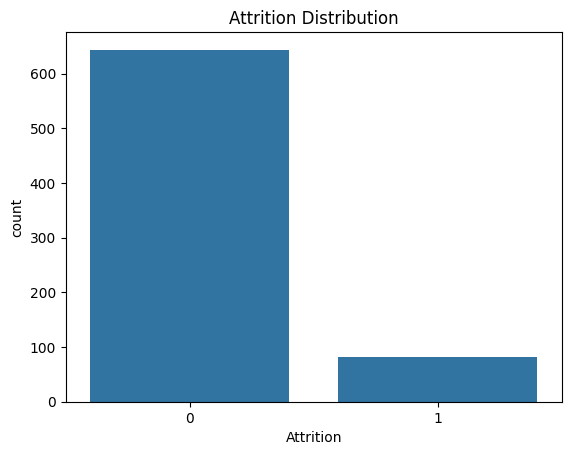

In [13]:
sns.countplot(x="Attrition",data=df)
plt.title("Attrition Distribution")
plt.show()

2. Gender vs Attrition

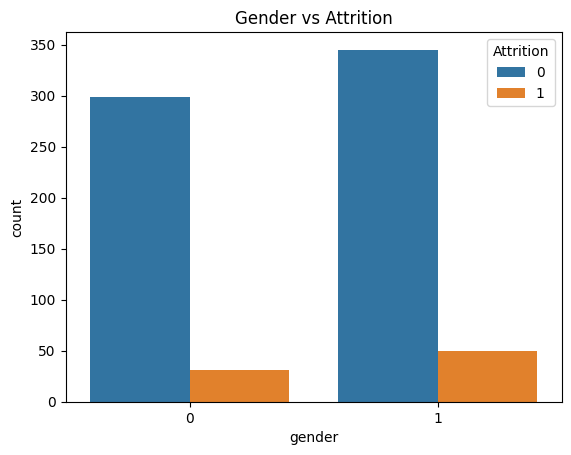

In [14]:
sns.countplot(x="gender",hue="Attrition",data=df)
plt.title("Gender vs Attrition")
plt.show()

3. Department wise Attrition


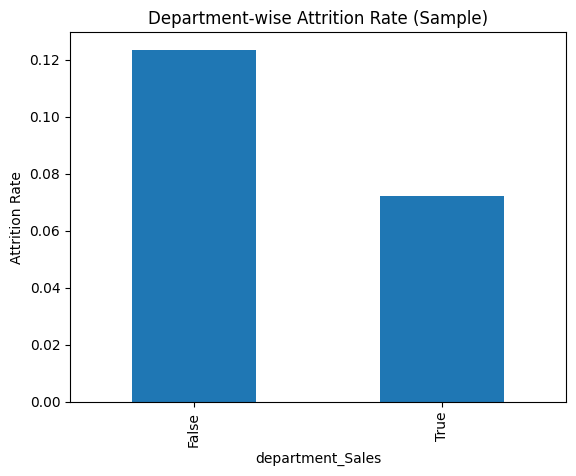

In [18]:
dept_attr=df.groupby("department_Sales")["Attrition"].mean()
dept_attr.plot(kind="bar")
plt.title("Department-wise Attrition Rate (Sample)")
plt.ylabel("Attrition Rate")
plt.show()

4. Salary Distribution

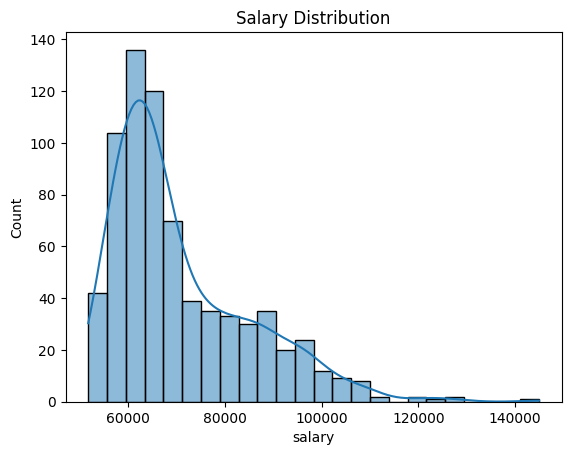

In [19]:
sns.histplot(df["salary"],kde=True)
plt.title("Salary Distribution")
plt.show()

5. Salary vs Attrition

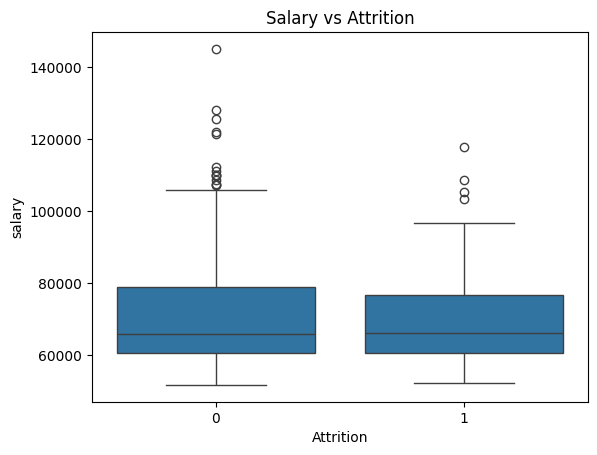

In [22]:
sns.boxplot(x="Attrition",y="salary",data=df)
plt.title("Salary vs Attrition")
plt.show()

6. Age Distribution

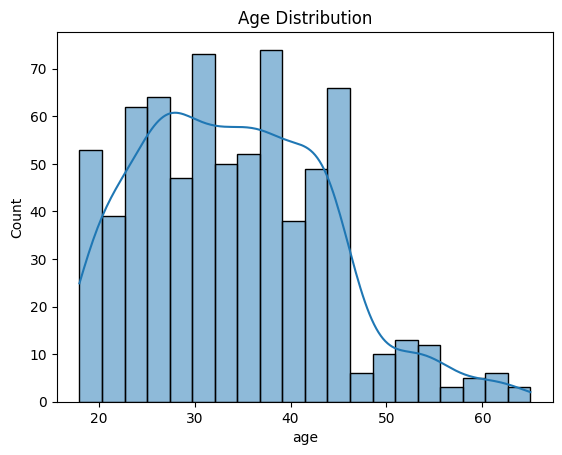

In [23]:
sns.histplot(df["age"],bins=20,kde=True)
plt.title("Age Distribution")
plt.show()

7. Experience vs Attrition

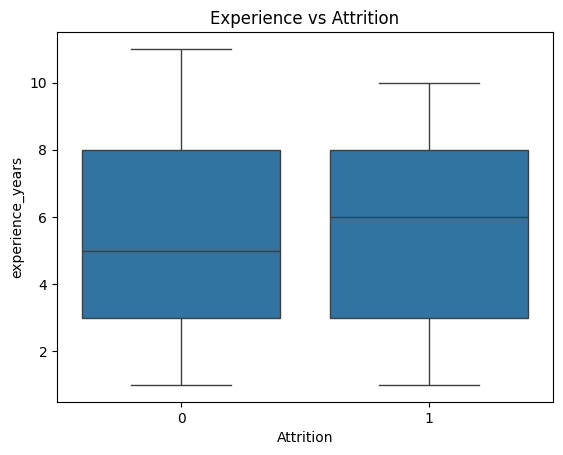

In [24]:
sns.boxplot(x="Attrition",y="experience_years",data=df)
plt.title("Experience vs Attrition")
plt.show()

8. Correlation Heatmap

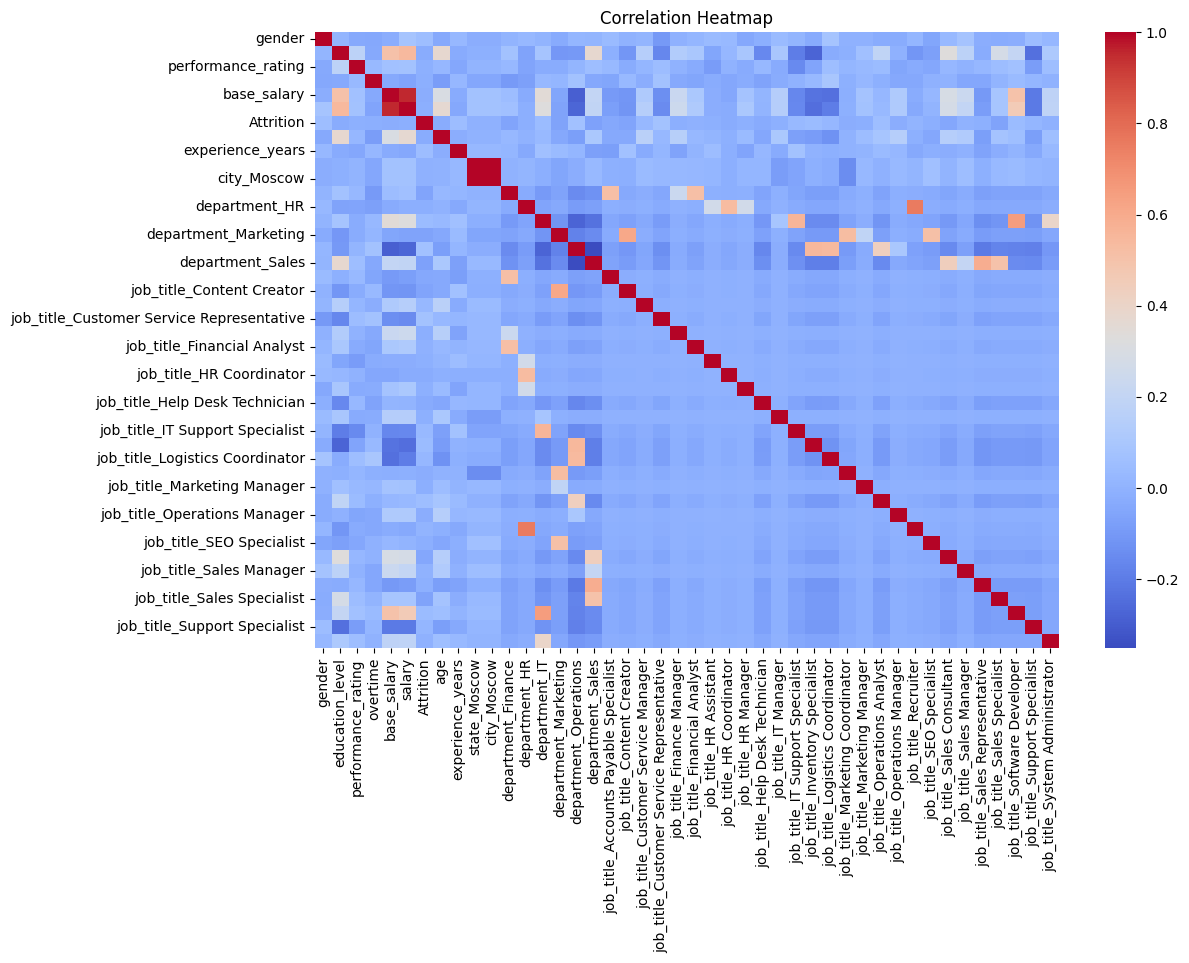

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Q. Create : salary_difference=salary-base_salary  |  
Then Answer : Does higher difference reduce attrition ?

In [35]:
df["salary_difference"] = df["salary"] - df["base_salary"]
print("sample data :\n")
print(df[["salary","base_salary","salary_difference","Attrition"]].head())

sample data :

   salary  base_salary  salary_difference  Attrition
0   84511        79104               5407          0
1   58165        54030               4135          0
2   60266        55805               4461          0
3   64566        53844              10722          0
4   61998        58672               3326          0


In [27]:
df.groupby("Attrition")["salary_difference"].mean()


Attrition
0    7541.083851
1    7636.061728
Name: salary_difference, dtype: float64

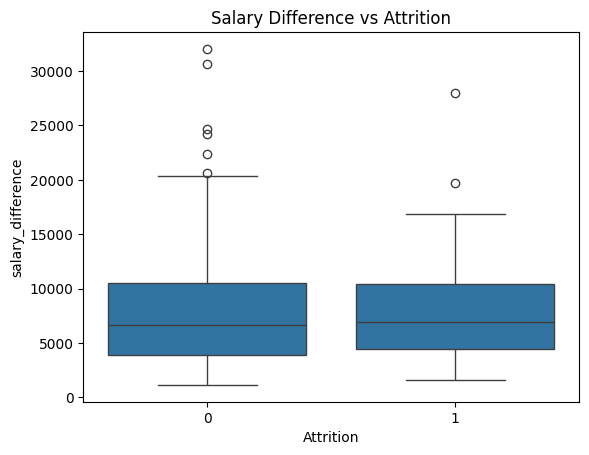

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Attrition", y="salary_difference", data=df)
plt.title("Salary Difference vs Attrition")
plt.show()


In [37]:
df[["salary_difference","Attrition"]].corr()

,salary_difference,Attrition
salary_difference,1.000000,0.006724
Attrition,0.006724,1.000000
